In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import datetime

In [3]:
colnames = ["time_interval", "id_1", "id_2", "class_id_1", "class_id_2"]

df_2011 = pd.read_csv(
    "/Users/miric/Documents/GitHub/NetworkRugs/Miranda/thiers_2011.csv",
    sep="\t",
    header=None,
    names=colnames
)

# Convert seconds → HH:MM
df_2011["hh_mm"] = df_2011["time_interval"].apply(
    lambda x: str(datetime.timedelta(seconds=int(x)))  # remove :ss
)

print("2011 interactions:")
display(df_2011)
print()


df_2012 = pd.read_csv(
    "/Users/miric/Documents/GitHub/NetworkRugs/Miranda/thiers_2012.csv",
    sep="\t",
    header=None,
    names=colnames
)

'''
df_2012["hh_mm"] = df_2012["time_interval"].apply(
    lambda x: str(datetime.timedelta(seconds=int(x)))
)
'''

# Convert to datetime (UTC)
df_2012["datetime_utc"] = pd.to_datetime(df_2012["time_interval"], unit="s", utc=True)

print("2012 interactions:")
display(df_2012)




2011 interactions:


,time_interval,id_1,id_2,class_id_1,class_id_2,hh_mm
0,54120,26,66,PC,PC,15:02:00
1,54140,26,66,PC,PC,15:02:20
2,54160,24,25,PC,PC,15:02:40
3,54160,100,37,PC,PC,15:02:40
4,54180,37,57,PC,PC*,15:03:00
...,...,...,...,...,...,...
28556,326130,81,75,PC,PC,"3 days, 18:35:30"
28557,326150,81,75,PC,PC,"3 days, 18:35:50"
28558,326210,81,75,PC,PC,"3 days, 18:36:50"
28559,326270,88,125,PC,PC,"3 days, 18:37:50"



2012 interactions:


,time_interval,id_1,id_2,class_id_1,class_id_2,datetime_utc
0,1353303380,1170,1644,MP*1,MP*1,2012-11-19 05:36:20+00:00
1,1353303400,1170,1613,MP*1,MP*1,2012-11-19 05:36:40+00:00
2,1353303640,1170,1644,MP*1,MP*1,2012-11-19 05:40:40+00:00
3,1353303760,1181,1651,MP*1,MP*1,2012-11-19 05:42:40+00:00
4,1353303840,1108,1190,MP*1,MP*1,2012-11-19 05:44:00+00:00
...,...,...,...,...,...,...
45042,1354032580,880,887,PC*,PC*,2012-11-27 16:09:40+00:00
45043,1354032580,854,869,PSI*,PSI*,2012-11-27 16:09:40+00:00
45044,1354032600,880,887,PC*,PC*,2012-11-27 16:10:00+00:00
45045,1354032760,620,669,MP*2,MP*2,2012-11-27 16:12:40+00:00


time_interval 2011
- no idea, if converted into hh_mm format it is 15:02

time_interval 2012 could be in Unixcode
- 2012-11-23 07:50:40 - 1353657040 seconds since 1 Jan 1970 00:00:00 UTC

# Data exploration

In [4]:
G_2011 = nx.from_pandas_edgelist(df_2011, "id_1", "id_2")

print("2011 network data:")
print(f"Number of nodes: {G_2011.number_of_nodes()}")
print(f"Number of edges: {G_2011.number_of_edges()}")

num_unique_intervals = df_2011["time_interval"].nunique()
print(f"Number of timestamps: {num_unique_intervals}")


G_2012 = nx.from_pandas_edgelist(df_2012, "id_1", "id_2")

print()
print("2012 network data:")
print(f"Number of nodes: {G_2012.number_of_nodes()}")
print(f"Number of edges: {G_2012.number_of_edges()}")

num_unique_intervals = df_2012["time_interval"].nunique()
print(f"Number of timestamps: {num_unique_intervals}")



2011 network data:
Number of nodes: 126
Number of edges: 1710
Number of timestamps: 5609

2012 network data:
Number of nodes: 180
Number of edges: 2220
Number of timestamps: 11273


In [5]:
top_intervals_2011 = df_2011["time_interval"].value_counts().head(20)

print("Top 20 most active time intervals for 2011 data:")
print(top_intervals_2011)

top_intervals_2012 = df_2012["time_interval"].value_counts().head(20)

print()
print("Top 20 most active time intervals for 2012 data:")
print(top_intervals_2012)



Top 20 most active time intervals for 2011 data:
time_interval
62860     38
62880     37
62900     35
62800     33
235320    32
62700     32
62960     32
235500    32
62780     30
235360    30
62840     30
62720     30
235520    30
235160    29
149420    29
315720    28
62820     28
323240    28
54940     28
323380    28
Name: count, dtype: int64

Top 20 most active time intervals for 2012 data:
time_interval
1353657040    40
1353657120    38
1353311960    37
1353657480    36
1353312080    35
1353311880    35
1353571160    35
1353657260    35
1353657500    35
1353657340    35
1353311660    35
1353657180    34
1353657060    34
1353657080    34
1353657020    34
1353571140    33
1353657300    32
1353916580    32
1353657200    32
1353657140    32
Name: count, dtype: int64


Average degree centrality: 0.1378


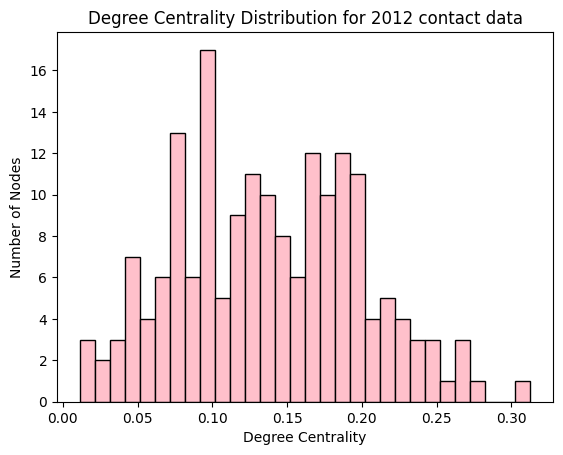

[(826, 0.3128491620111732),
 (683, 0.27932960893854747),
 (620, 0.2681564245810056),
 (641, 0.26256983240223464),
 (860, 0.26256983240223464),
 (1657, 0.2569832402234637),
 (681, 0.25139664804469275),
 (661, 0.2458100558659218),
 (869, 0.2458100558659218),
 (692, 0.2346368715083799)]

In [40]:
# Degree centrality measures how connected each node is relative to the total possible connections
centrality = nx.degree_centrality(G_2012)

# Sort nodes by centrality descending
top_nodes = dict(sorted(centrality.items(), key=lambda item: item[1], reverse=True))
top_10 = list(top_nodes.items())[:10]

avg_centrality = sum(centrality.values()) / len(centrality)
print(f"Average degree centrality: {avg_centrality:.4f}")

plt.hist(list(centrality.values()), bins =30,  color='pink', edgecolor='black')
plt.xlabel("Degree Centrality")
plt.ylabel("Number of Nodes")
plt.title("Degree Centrality Distribution for 2012 contact data")
plt.show()

top_10



(826, 0.3128491620111732)
Person 826 interacted with ~31% of the entire population during this time window.

Average degree centrality: 0.0064


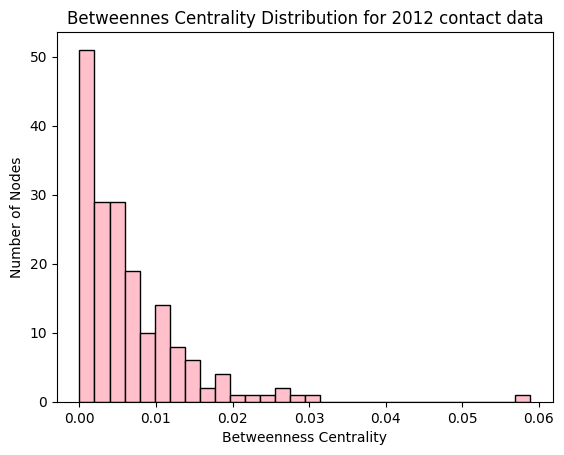

[(826, 0.05891680646992869),
 (620, 0.029566243348582086),
 (860, 0.0286711660373446),
 (641, 0.02667279796142687),
 (1657, 0.025820225297560437),
 (683, 0.02400967829302763),
 (887, 0.02188627585862163),
 (1678, 0.02005998346799868),
 (1662, 0.019496551784751417),
 (869, 0.019395772204075446)]

In [ ]:
# Betweenness centrality measures how often a node lies on the shortest paths between other nodes - nodes that bridge groups
bet_centrality = nx.betweenness_centrality(G_2012)

top_nodes_bet = dict(sorted(bet_centrality.items(), key=lambda item: item[1], reverse=True))
top_10_bet = list(top_nodes_bet.items())[:10]

plt.hist(list(bet_centrality.values()), bins = 30, color='pink', edgecolor='black')
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Nodes")
plt.title("Betweennes Centrality Distribution for 2012 contact data")
plt.show()

top_10_bet

High betweenness = the node is a bridge, broker, or connector between groups.

Low betweenness = the node is not essential for linking communities.

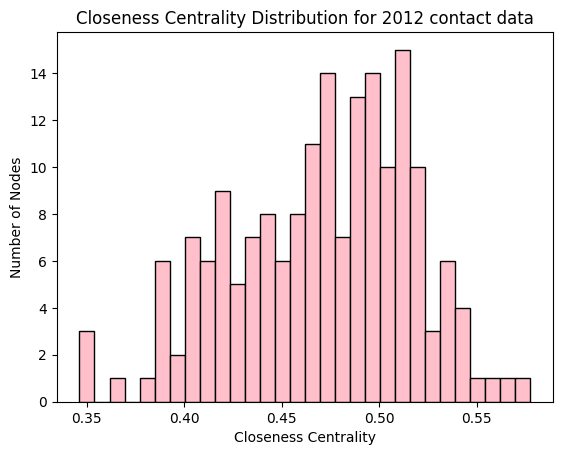

[(826, 0.5774193548387097),
 (683, 0.5646687697160884),
 (681, 0.557632398753894),
 (636, 0.5507692307692308),
 (860, 0.5440729483282675),
 (654, 0.5424242424242425),
 (1657, 0.5424242424242425),
 (635, 0.540785498489426),
 (869, 0.5359281437125748),
 (641, 0.5359281437125748)]

In [20]:
# Nodes closest to all others
close_centrality = nx.closeness_centrality(G_2012)

top_nodes_cl = dict(sorted(close_centrality.items(), key=lambda item: item[1], reverse=True))
top_10_cl = list(top_nodes_cl.items())[:10]

plt.hist(list(close_centrality.values()), bins = 30, color='pink', edgecolor='black')
plt.xlabel("Closeness Centrality")
plt.ylabel("Number of Nodes")
plt.title("Closeness Centrality Distribution for 2012 contact data")
plt.show()

top_10_cl

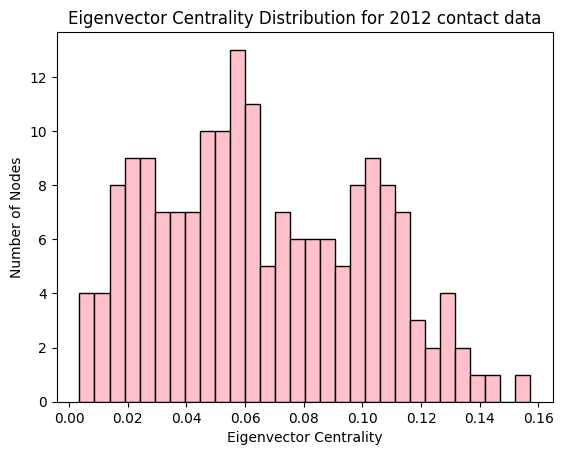

[(683, 0.15726929795547473),
 (826, 0.14349601587250654),
 (681, 0.13819175842299417),
 (1657, 0.13225007664528726),
 (661, 0.13189706629965775),
 (654, 0.130555004557456),
 (692, 0.12861638343563964),
 (620, 0.12690312967441847),
 (623, 0.12687230066909164),
 (1674, 0.1252348813481569)]

In [19]:
# Nodes connected to other important nodes
eig_centrality = nx.eigenvector_centrality(G_2012)

top_nodes_eig = dict(sorted(eig_centrality.items(), key=lambda item: item[1], reverse=True))
top_10_eig = list(top_nodes_eig.items())[:10]

plt.hist(list(eig_centrality.values()), bins = 30, color='pink', edgecolor='black')
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Number of Nodes")
plt.title("Eigenvector Centrality Distribution for 2012 contact data")
plt.show()

top_10_eig

Sampled timestamps: [1353303380 1353479900 1353674180 1354032880]


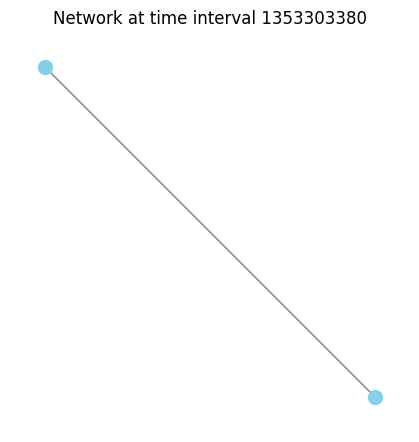

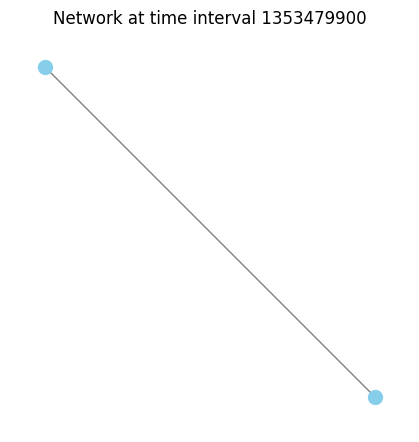

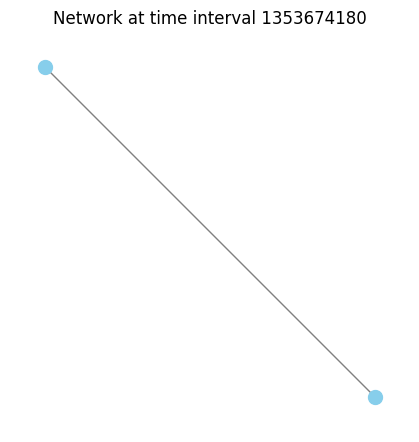

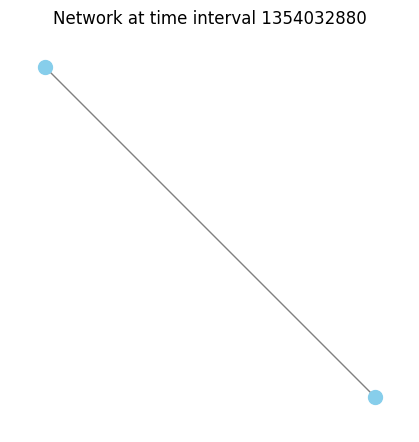

In [30]:
# Get all unique time intervals
unique_intervals = np.sort(df_2012["time_interval"].unique())

# Sample 10 evenly spaced timestamps
sampled_intervals = np.linspace(0, len(unique_intervals)-1, 4, dtype=int)
sampled_intervals = unique_intervals[sampled_intervals]

print("Sampled timestamps:", sampled_intervals)

for t in sampled_intervals:
    # Subset dataframe for this timestamp
    df_t = df_2012[df_2012["time_interval"] == t]
    
    # Build network
    G_t = nx.from_pandas_edgelist(df_t, "id_1", "id_2")
    
    # Plot
    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(G_t, seed=42)  # force-directed layout
    nx.draw(
        G_t, pos,
        node_color='skyblue',
        edge_color='gray',
        node_size=100,
        with_labels=False
    )
    plt.title(f"Network at time interval {t}")
    plt.show()


## Looking at timestamps with at least 5 interactions simulatenously

Selected timestamps with enough interactions: Index([1353304160, 1353408340, 1353666700, 1354025280], dtype='int64', name='time_interval')


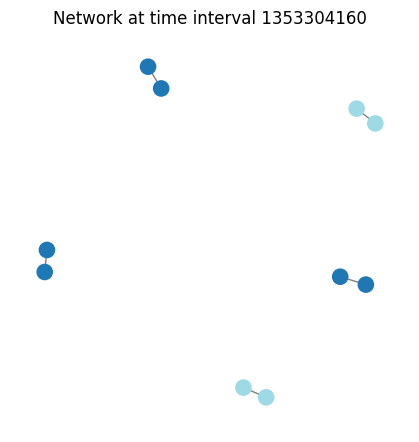

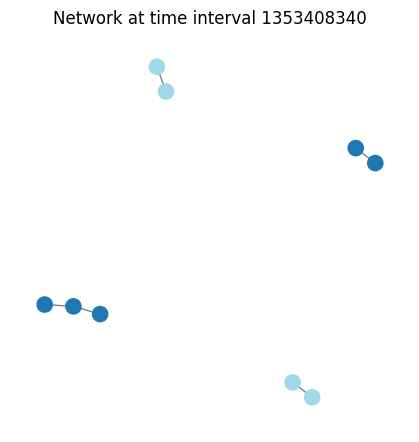

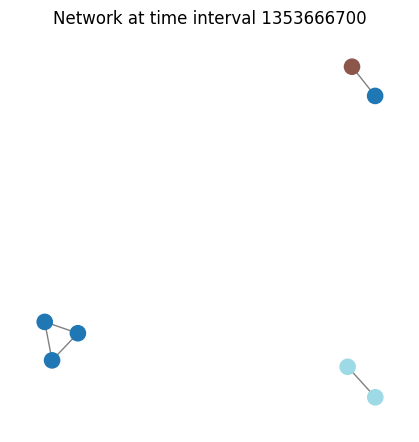

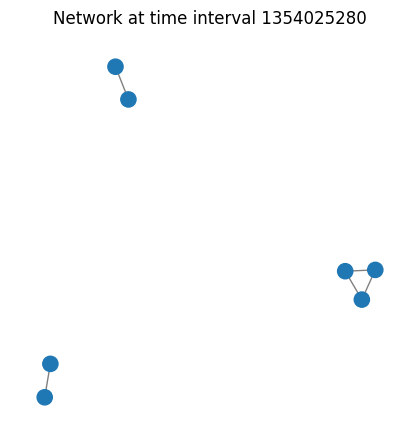

In [ ]:
# Count number of interactions per timestamp
interactions_per_interval = df_2012.groupby("time_interval").size()

# Keep only timestamps with >= 5 interactions
valid_intervals = interactions_per_interval[interactions_per_interval >= 5].index

# Sample 4 timestamps from these
sampled_intervals = np.linspace(0, len(valid_intervals)-1, 4, dtype=int)
sampled_intervals = valid_intervals[sampled_intervals]

print("Selected timestamps with enough interactions:", sampled_intervals)

for t in sampled_intervals:
    df_t = df_2012[df_2012["time_interval"] == t]

    # Build graph
    G_t = nx.from_pandas_edgelist(df_t, "id_1", "id_2")

    # Assign class to each node
    class_map = {}

    for _, row in df_t.iterrows():
        class_map[row["id_1"]] = row["class_id_1"]
        class_map[row["id_2"]] = row["class_id_2"]

    nx.set_node_attributes(G_t, class_map, "class")

    # Convert class labels to numeric codes for coloring
    classes = nx.get_node_attributes(G_t, "class")
    unique_classes = sorted(set(classes.values()))
    class_to_color = {c: i for i, c in enumerate(unique_classes)}

    node_colors = [class_to_color[classes[n]] for n in G_t.nodes()]

    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(G_t, seed=42)

    nx.draw(
        G_t, pos,
        node_color=node_colors,
        cmap="tab20",     # 20 distinct colors
        edge_color="gray",
        node_size=120,
        with_labels=False
    )

    plt.title(f"Network at time interval {t}")
    plt.show()


## Busiest timestamps

Top 10 busiest timestamps: [1353657040, 1353657120, 1353311960, 1353657480, 1353312080, 1353311880, 1353571160, 1353657260, 1353657500, 1353657340]


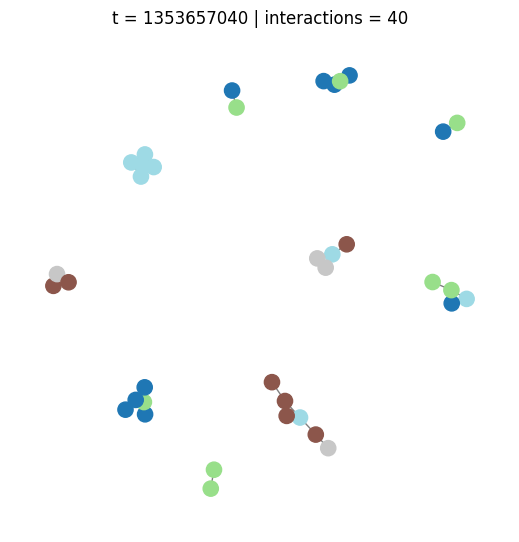

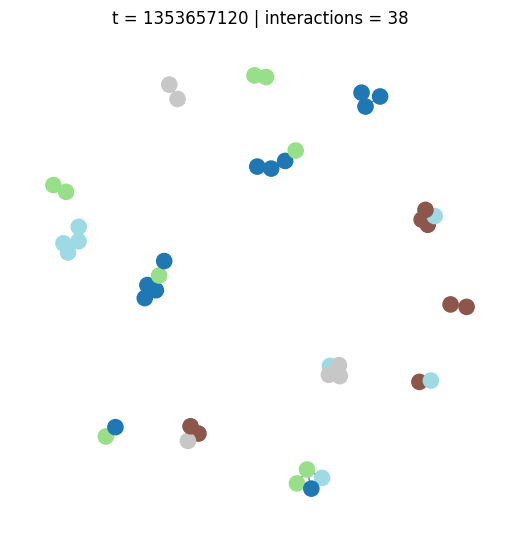

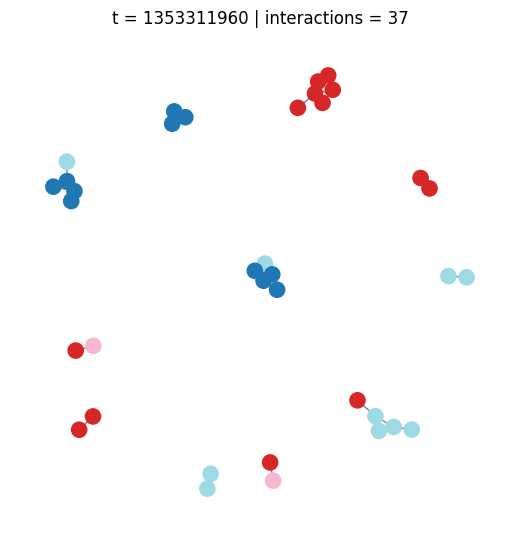

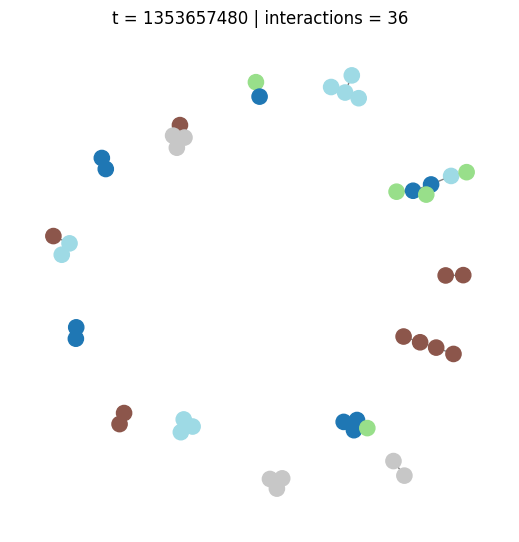

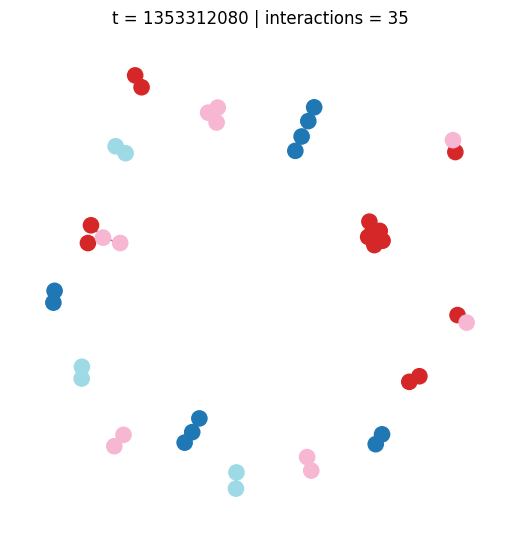

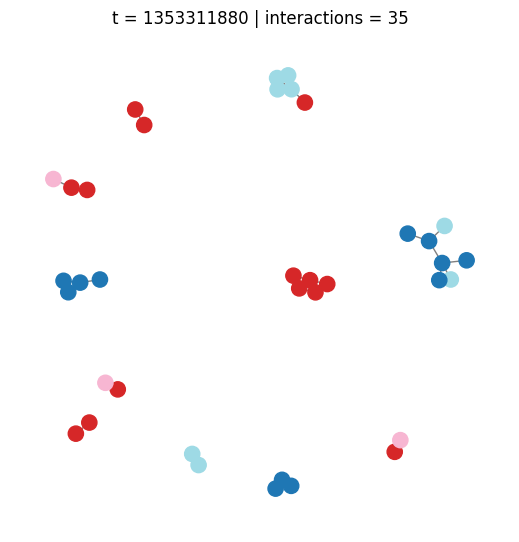

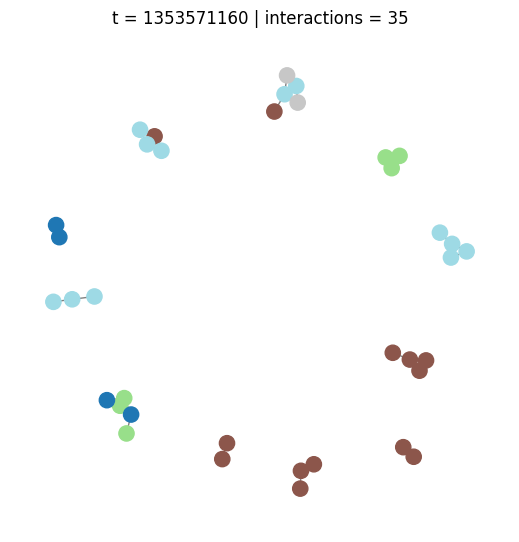

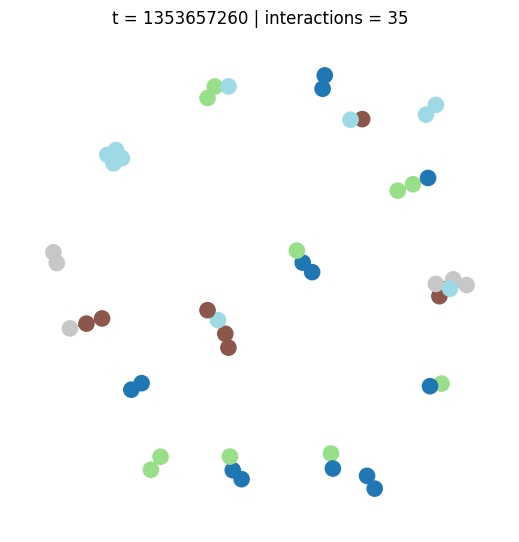

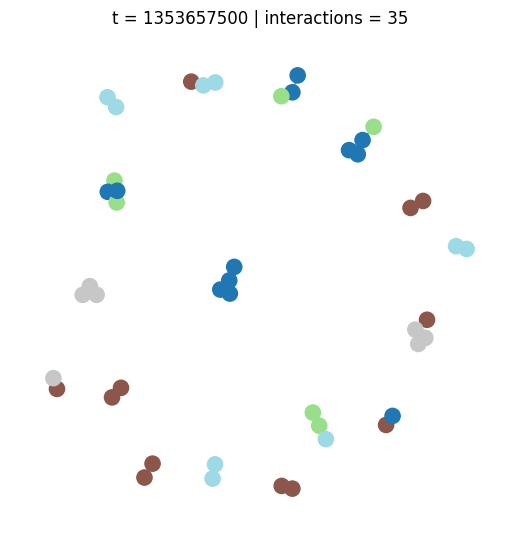

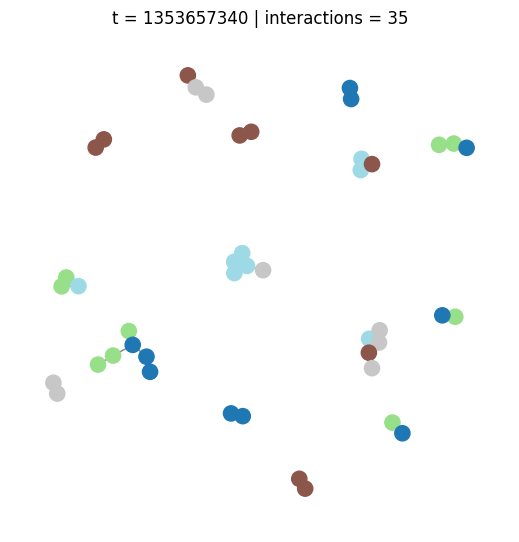

In [30]:
# Count number of interactions per timestamp
interactions_per_interval = df_2012.groupby("time_interval").size()

# Select the 4 timestamps with the highest interaction counts
top_intervals = interactions_per_interval.sort_values(ascending=False).head(10).index

print("Top 10 busiest timestamps:", top_intervals.tolist())

for t in top_intervals:
    df_t = df_2012[df_2012["time_interval"] == t]

    # Build graph
    G_t = nx.from_pandas_edgelist(df_t, "id_1", "id_2")

    # Assign class to each node
    class_map = {}

    for _, row in df_t.iterrows():
        class_map[row["id_1"]] = row["class_id_1"]
        class_map[row["id_2"]] = row["class_id_2"]

    nx.set_node_attributes(G_t, class_map, "class")

    # Convert class labels to numeric codes for coloring
    classes = nx.get_node_attributes(G_t, "class")
    unique_classes = sorted(set(classes.values()))
    class_to_color = {c: i for i, c in enumerate(unique_classes)}

    node_colors = [class_to_color[classes[n]] for n in G_t.nodes()]

    plt.figure(figsize=(5, 5))
    pos = nx.spring_layout(G_t, seed=42)

    nx.draw(
        G_t, pos,
        node_color=node_colors,
        cmap="tab20",
        edge_color="gray",
        node_size=120,
        with_labels=False
    )

    num_interactions = len(df_t)

    plt.title(f"t = {t} | interactions = {num_interactions}")
    plt.show()


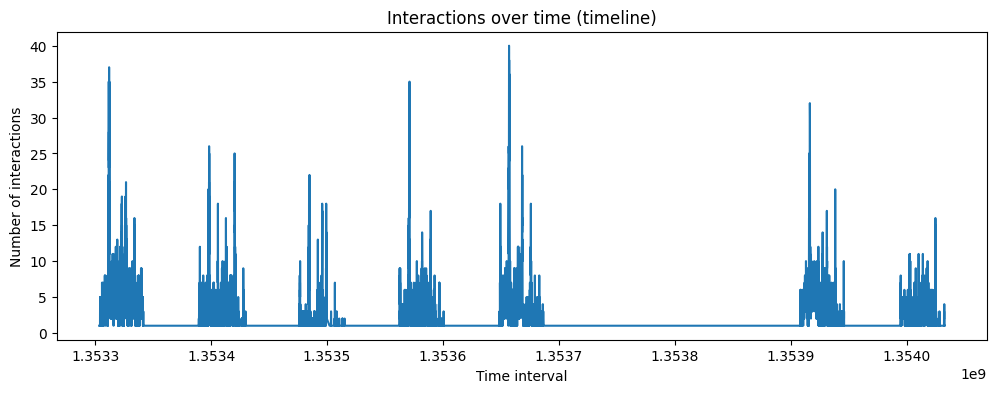

In [31]:
plt.figure(figsize=(12,4))
plt.plot(interactions_per_interval.index, interactions_per_interval.values)
plt.xlabel("Time interval")
plt.ylabel("Number of interactions")
plt.title("Interactions over time (timeline)")
plt.show()

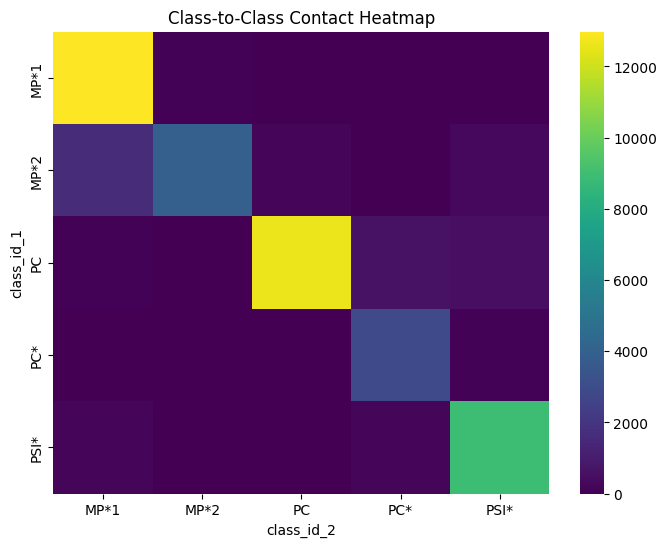

In [ ]:
# Heatmap of interactions between classes
import seaborn as sns

pair_counts = df_2012.groupby(["class_id_1", "class_id_2"]).size().unstack(fill_value=0) # unstack pivots second index class_id_2 into column

plt.figure(figsize=(8,6))
sns.heatmap(pair_counts, cmap="viridis", annot=False)
plt.title("Class-to-Class Contact Heatmap")
plt.show()


## Converting 2012 data into json file

In [38]:
import json

result = {}

# Group by timestamp
for t, df_t in df_2012.groupby("time_interval"):

    # Create node attributes
    nodes = {}

    for _, row in df_t.iterrows():
        # Add id_1
        if row["id_1"] not in nodes:
            nodes[row["id_1"]] = {
                "id": int(row["id_1"]),
                "class_id": row["class_id_1"]
            }
        # Add id_2
        if row["id_2"] not in nodes:
            nodes[row["id_2"]] = {
                "id": int(row["id_2"]),
                "class_id": row["class_id_2"]
            }

    # Convert dict → list
    nodes_list = list(nodes.values())

    # Create edges
    links_list = []
    for _, row in df_t.iterrows():
        links_list.append({
            "source": int(row["id_1"]),
            "target": int(row["id_2"]),
            "weight": 1
        })

    # Insert into final structure under key "t_<timestamp>"
    result[f"t_{t}"] = {
        "nodes": nodes_list,
        "links": links_list
    }

# Save to JSON
with open("data/contact_pattern_2012.json", "w") as f:
    json.dump(result, f, indent=4)


## Computing Jaccard similarity to determine how to split timestamps

Measures how similar two sets are. In the context of a network with timestamps, it shows how much overlap there is between the sets of connections or events at different timestamps.

- If the similarity is high, the timestamps have similar interactions, so we might merge or pick one.

- If the similarity is low, the timestamps are different, so we might keep both to capture distinct network states.

In [8]:
# Build an edge-set per timestamp (lighter than creating a graph per timestamp - over 10.000 timestamps)
from collections import defaultdict

# Dictionary: timestamp -> set of (id_1, id_2)
edges_by_time = defaultdict(set)

for _, row in df_2012.iterrows():
    t = row["time_interval"]
    edge = tuple(sorted((row["id_1"], row["id_2"])))   # sort to avoid direction issues
    edges_by_time[t].add(edge)

# edges_by_time


In [ ]:
# Compute Jaccard similarity between consecutive timestamps
timestamps = sorted(edges_by_time.keys()) # compare consecutive times in order

jaccard_scores = []

for i in range(len(timestamps) - 1):
    t1, t2 = timestamps[i], timestamps[i+1]
    e1, e2 = edges_by_time[t1], edges_by_time[t2]
    
    if len(e1) == 0 and len(e2) == 0:
        score = 1.0
    else:
        score = len(e1 & e2) / len(e1 | e2)
    
    jaccard_scores.append((t1, t2, score))


In [ ]:
# Turn result into dataframe

df_jaccard = pd.DataFrame(jaccard_scores, columns=["t1", "t2", "jaccard"])
display(df_jaccard)

# Counting how many timestamps are under the 0.9 threshold (1 is identical, 0.9 almost the same)

low_similarity_count_09 = (df_jaccard['jaccard'] < 0.9).sum()
print(low_similarity_count_09)

low_similarity_count_06 = (df_jaccard['jaccard'] < 0.6).sum()
print(low_similarity_count_06)

low_similarity_count_06 = (df_jaccard['jaccard'] < 0.6).sum()
print(low_similarity_count_06)


,t1,t2,jaccard
0,1353303380,1353303400,0.000000
1,1353303400,1353303640,0.000000
2,1353303640,1353303760,0.000000
3,1353303760,1353303840,0.000000
4,1353303840,1353304000,0.000000
...,...,...,...
11267,1354032460,1354032560,0.333333
11268,1354032560,1354032580,0.500000
11269,1354032580,1354032600,0.250000
11270,1354032600,1354032760,0.000000


9952
8112


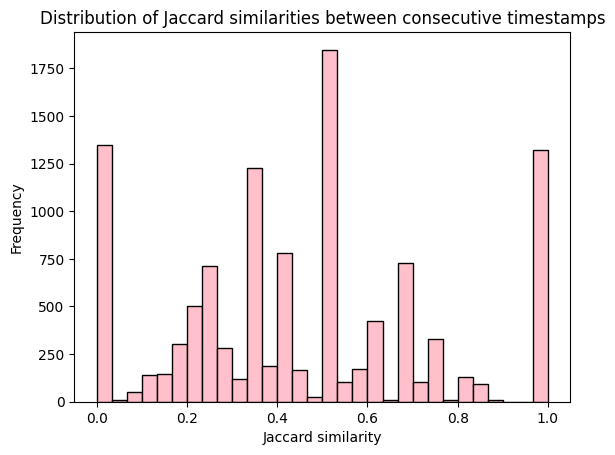

In [15]:
# how many consecutive timestamps are very similar, moderately similar, or very different

plt.hist(df_jaccard['jaccard'], bins=30, color='pink', edgecolor='black')
plt.xlabel('Jaccard similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Jaccard similarities between consecutive timestamps')
plt.show()


### Choosing the threshold
- Look for a natural “gap” or drop in the histogram where similarity values are sparse
- Our network changes slowly at times (during the breaks) and then fast (when the breaks resume)


## Testing NetworkRugs on our new data
> **Events → Windows → Graphs → Ordering → Pixels → Interpretation**

### Phase A: Turn data data into snapshots (most important step)+ choose a time granularity
Rule of thumb: too fine → noise, too coarse → nothing happens


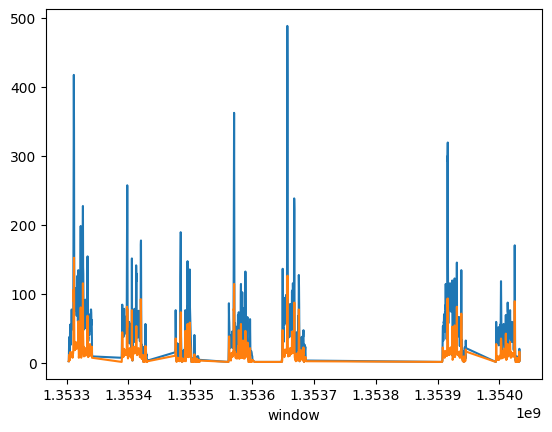

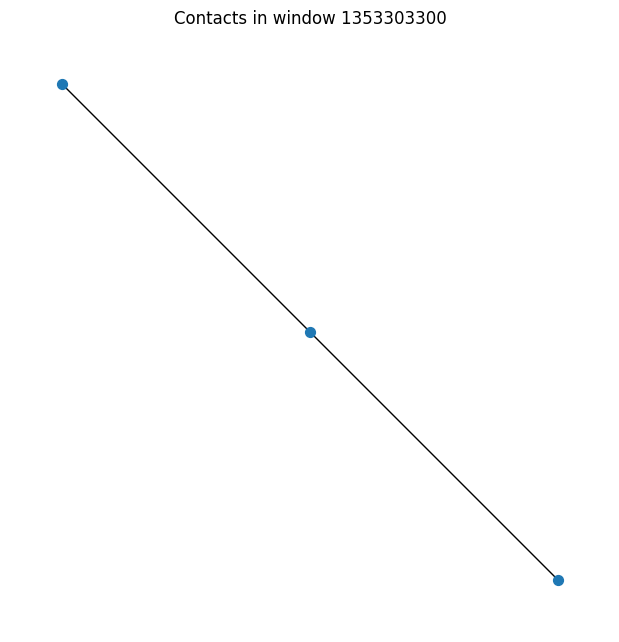

In [ ]:
# Creating window column
window = 300  # 5 minutes in seconds
df_2012["window"] = (df_2012["time_interval"] // window) * window

# Interactions per window overview
interactions_per_window = (
    df_2012
    .groupby("window")
    .size()
)

interactions_per_window.plot()

# How many unique pairs per window? Since we are enot using weights yet, have to count each interaction within the window only once
df_2012["u"] = df_2012[["id_1", "id_2"]].min(axis=1)
df_2012["v"] = df_2012[["id_1", "id_2"]].max(axis=1)

unique_pairs_per_window = (
    df_2012
    .drop_duplicates(subset=["window", "u", "v"])
    .groupby("window")
    .size()
)
unique_pairs_per_window.plot()

# Visualizing a single window network
one_window = df_2012["window"].iloc[0]
df_w = df_2012[df_2012["window"] == one_window]
# Deduplicating edges
edges = df_w.drop_duplicates(subset=["u", "v"])

G = nx.from_pandas_edgelist(edges, "u", "v")

plt.figure(figsize=(6, 6))
nx.draw(G, node_size=50, with_labels=False)
plt.title(f"Contacts in window {one_window}")
plt.show()





---

### Phase B: Build snapshot graphs

For each time step ( t ):

```text
G_t = (V_t, E_t)
```



In [ ]:
# ensuring global node setting (reference roster of students)
nodes = pd.unique(df_2012[["id_1", "id_2"]].values.ravel())
print(f"Total unique students: {len(nodes)}")


Total unique students: 180


In [ ]:
# building snapshot graphs per window
graphs = {}

for w, df_w in df_2012.groupby("window"):
    G = nx.Graph()
    
    # add all nodes (stable across time)
    G.add_nodes_from(nodes)
    
    # deduplicate edges within the window
    edges = df_w.drop_duplicates(subset=["u", "v"])
    G.add_edges_from(edges[["u", "v"]].itertuples(index=False))
    
    graphs[w] = G

,window,edges,largest_cc
0,1353303300,2,3
1,1353303600,3,2
2,1353303900,11,5
3,1353304200,8,4
4,1353304500,3,2
...,...,...,...
890,1354031400,1,2
891,1354031700,1,2
892,1354032000,2,2
893,1354032300,16,6


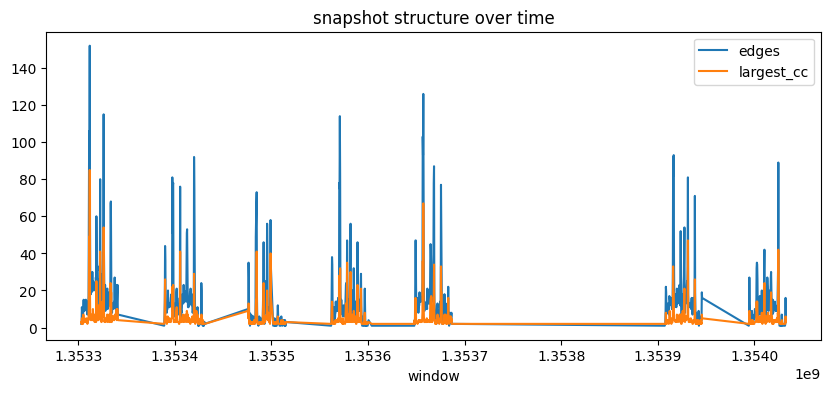

In [ ]:
# number of edges per snapshot - Is there any interaction in this window?
edges_per_window = {
    w: G.number_of_edges() for w, G in graphs.items()
}

# connected components - Is the network fragmented into many isolated pieces?
components_per_window = {
    w: nx.number_connected_components(G) for w, G in graphs.items()
}

# largest connected component - Is there a group, not just pairs?
largest_cc = {}

for w, G in graphs.items():
    if G.number_of_edges() == 0:
        largest_cc[w] = 0
    else:
        largest_cc[w] = len(max(nx.connected_components(G), key=len))

# summarz for comparisons
summary_df = pd.DataFrame({
    "window": list(graphs.keys()),
    "edges": list(edges_per_window.values()),
    "largest_cc": list(largest_cc.values())
}).sort_values("window")

summary_df.plot(
    x="window",
    y=["edges", "largest_cc"],
    figsize=(10, 4),
    title="snapshot structure over time"
)

# Edges: How many unique student pairs interacted in that window
# largest_cc : How many students are connected together in the largest group, tells us if there is a group or just isolated pairs in each snapshot

summary_df

This graph helps us because with Priority-BFS and NetworkRugs we:

- do not care how many times two nodes met

- care whether the network has dense local neighborhoods

### Phase C: Before moving to visualizations, we check the windows provide enough information i.e. sanity checks!

In [32]:
# Are most snapshots non-empty?
# >= 0.6 → good
# < 0.5 → too sparse → increase window size
non_empty_ratio = (summary_df["edges"] > 0).mean()
print(non_empty_ratio)

# all snapshots are non-empty !

# Defining a minimal meaningful group size
# >= 0.5 → many snapshots contain real groups
# < 0.4 → structure is too weak
MIN_GROUP_SIZE = 5

meaningful_group_ratio = (
    summary_df["largest_cc"] >= MIN_GROUP_SIZE
).mean()

print(meaningful_group_ratio)

# Does structure persist over time?
# >= 2–3 consecutive windows → temporal persistence
# = 1 → isolated spikes (bad)
is_large = summary_df["largest_cc"] >= MIN_GROUP_SIZE

# Count runs of consecutive "large" windows
runs = (is_large != is_large.shift()).cumsum()
run_lengths = is_large.groupby(runs).sum()

max_run_length = run_lengths.max()
print(max_run_length)

# Do values change smoothly (not random noise)?
# Measures relative variability of the largest component 
# cv_lcc < 1.0 → reasonably stable
# cv_lcc >> 1.0 → noisy structure

mean_lcc = summary_df["largest_cc"].mean()
std_lcc = summary_df["largest_cc"].std()

cv_lcc = std_lcc / mean_lcc if mean_lcc > 0 else float("inf")
print(cv_lcc)



1.0
0.33743016759776534
9
1.2382740411575515


In [31]:
# Automated decision rule
passes_phase_c = (
    non_empty_ratio >= 0.6 and
    meaningful_group_ratio >= 0.5 and
    max_run_length >= 2 and
    cv_lcc < 1.5
)

print(f"Non-empty windows: {non_empty_ratio:.2%}")
print(f"Meaningful group windows: {meaningful_group_ratio:.2%}")
print(f"Longest persistence run: {max_run_length}")
print(f"Largest CC variability (CV): {cv_lcc:.2f}")

if passes_phase_c:
    print("PASSED: proceed to visualization")
else:
    print("FAILED: revise window size or aggregation")




Non-empty windows: 100.00%
Meaningful group windows: 33.74%
Longest persistence run: 9
Largest CC variability (CV): 1.24
FAILED: revise window size or aggregation


### Phase D: Does any reasonable node ordering produce visible temporal structure?
If the answer is no, Priority-BFS won’t save it.
- Choose a simple ordering method, maybe degree-based


In [36]:
all_nodes = sorted(
    set(df_2012["id_1"]).union(df_2012["id_2"])
)

num_artists 180


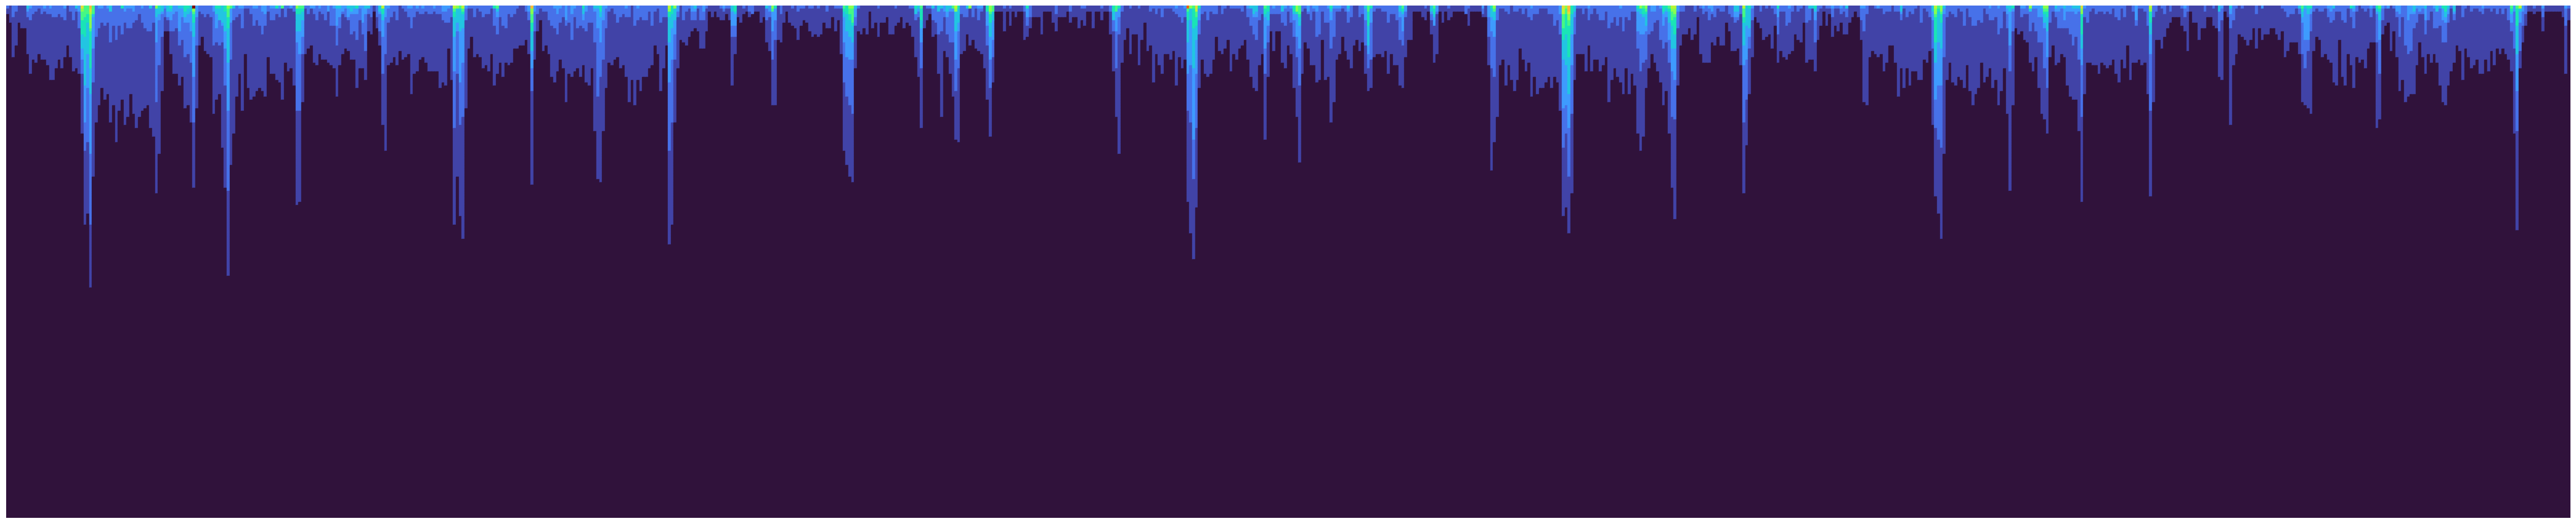

In [40]:
# Using Frederikes node ordering to draw the NetworkGraph
from ba_utils.orderings import get_degree_ordering
from ba_utils.visualization import draw_rug_from_graphs

degree_ordering = get_degree_ordering(graphs)

draw_rug_from_graphs(
    graphs_data=graphs,
    ordering=degree_ordering,
    color_encoding="degree",
    pixel_size=6
)




My output:
- A very thin horizontal band at the top
- Mostly dark (near-zero) pixels
- Looks like noise or a compressed heatmap
- num_artists = 180

Thesis output 
- ~20–30 nodes
- Clear vertical blocks
- Dense, readable patterns
- Community structure is visually obvious

Scale is issue here

##### Vertical compression destroys structure

In draw_rug_from_graphs() inside visualization.py:

pixel_size_y = target_height_px // num_artists
pixel_size = min(pixel_size_x, pixel_size_y)


With:
- target_height_px = 900

- num_artists = 180

We get:

pixel_size_y ≈ 900 / 180 ≈ 5 px


Now combined with:

- many nodes having degree = 0

- most interactions concentrated in a small subset

Resulting in 
- only top rows have color
- everything else is dark
- structure is visually crushed

This is expected, not an error.

##### School contact networks are extremely sparse per window

In synthetic data:
- almost every node has edges
- connectivity is dense
- communities are enforced

In our real data:
- most students are not interacting in a given 5-minute window
- we know because of the paper that students interact with ones within their own classes, and this dataset contains all 2-3 classes!
- degree distribution is extremely skewed
- many isolated nodes per snapshot


So when we color by degree:
- most rows are zero → dark
- a few rows flicker → noise-like pattern

This is why the rug looks emtpy :(



## Experimenting with the orderings


In [ ]:
from ba_utils.orderings import (
    get_degree_ordering,
    get_bfs_ordering,
    get_random_ordering
)

degree_ordering = get_degree_ordering(graphs)
bfs_ordering = get_bfs_ordering(graphs)
random_ordering = get_random_ordering(graphs)




ImportError: cannot import name 'get_bfs_ordering' from 'ba_utils.orderings' (c:\Users\miric\Documents\GitHub\NetworkRugs\ba_utils\orderings.py)

In [ ]:
# 3. Draw one NetworkRug per ordering
draw_rug_from_graphs(
    graphs_data=graphs,
    ordering=degree_ordering,
    color_encoding="degree",
    pixel_size=6,
    title="Degree ordering"
)

draw_rug_from_graphs(
    graphs_data=graphs,
    ordering=bfs_ordering,
    color_encoding="degree",
    pixel_size=6,
    title="BFS ordering"
)

draw_rug_from_graphs(
    graphs_data=graphs,
    ordering=random_ordering,
    color_encoding="degree",
    pixel_size=6,
    title="Random ordering"
)


- Degree:	Bands of high activity near top
- BFS:	Blocky, clustered structure
- Random:	No coherent structure

In [ ]:
# 4. Choose ONE ordering as your reference. Example:

ordering = degree_ordering



In [ ]:
# 5. Draw the NetworkRug (main figure)
draw_rug_from_graphs(
    graphs_data=graphs,
    ordering=ordering,
    color_encoding="degree",
    pixel_size=6,
    title="NetworkRug (degree ordering)"
)


# This is the primary visualization.

In [ ]:

# 6. Add snapshot graph layouts (supporting)
visualization.visualize_graphs(graphs)

Figure 1: NetworkRug with degree ordering
Figure 2: NetworkRug with BFS ordering
Figure 3: NetworkRug with random ordering

Figure 4: Snapshot layouts (reference)
Figure 5: Snapshot layouts colored by closeness centrality

### Fix options
- Restric the largest component, because the visualization is supposed to show structure within interacting groups, not isolated individuals
- Use one networkrug per class to see interactions within class (since most students don't interact with people outside their classes)

First suggestion for fix (chatgpt):Restrict to largest connected component

Re-run Phase D

Compare:

degree ordering

BFS ordering

Only then move to Priority-BFS

If you want, next I can:

help you automate component filtering

help you justify it methodologically

or tune parameters to get the cleanest possible rug

In [ ]:
# Fix 1
# Compute union graph
# Do this per snapshot or globally 
# #Global largest component (simplest)
G_union = nx.Graph()
for G in graphs.values():
    G_union.add_edges_from(G.edges())

largest_cc_nodes = max(nx.connected_components(G_union), key=len)

# Then rebuild graphs:
graphs_cc = {}

for w, G in graphs.items():
    H = G.subgraph(largest_cc_nodes).copy()
    graphs_cc[w] = H

# Now rerun:
nrugs.draw_networkrug(
    graphs_cc,
    color_encoding="degree",
    pixel_size=12,
    order="degree"
)

# Fix 2:
window = 900   # 15 minutes
# or
window = 1800  # 30 minutes
# Then rebuild snapshots and rerun Phase C.

# Fix 3:
# Use binary presence instead of degree (visual fix)
# Right now we color by degree: color_encoding="degree"
# Could try: color_encoding="id3" or  color_encoding="degree_centrality"


NameError: name 'graphs_cc' is not defined

visualization.visualize_graphs(simple)